#### Name : Aakanksha Patil

# TASK 1

### Prediction Using Supervised ML (Level - Beginner)

### Predict the percentage of marks of a student based on the number of study hours

#### Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The data is successfully imported

#### Data set size

In [3]:
df.shape

(25, 2)

There are 25 rows and 2 columns in the data. 'Hours' is the independent variable and 'Scores' is dependent variable

#### Information - Understanding the dtypes,null values in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Both the columns are numerical in type and there are no null values

#### Describe - 5 point summary (Statistical Details)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the above table, it is observed that the data is slightly right skewed as mean > median (50%)

#### EDA

#### Univariate Analysis

#### Distribution plot for 'Hours'

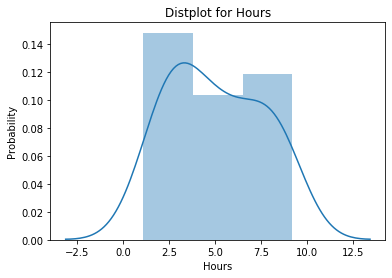

In [6]:
sns.distplot(df['Hours'])
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.title('Distplot for Hours')
plt.show()

#### Distribution plot for 'Scores'

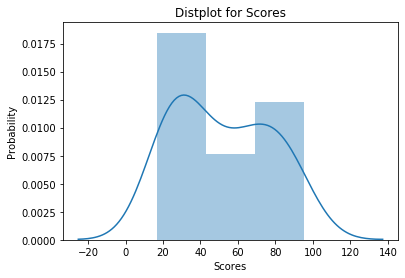

In [7]:
sns.distplot(df['Scores'])
plt.xlabel('Scores')
plt.ylabel('Probability')
plt.title('Distplot for Scores')
plt.show()

From both the plots it is observed that the distribution of both the variables is slightly right skewed

#### Bivariate Analysis

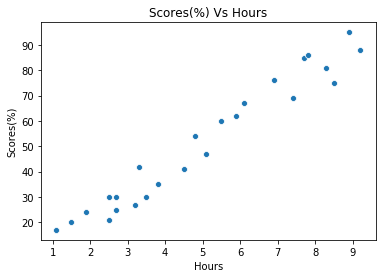

In [8]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.title('Scores(%) Vs Hours')
plt.show()

From above scatter plot, it is observed that scores are highly positively correlated with number of hours spent in studying. As the number of hours increases so shall the marks increase

#### Multivariate Analysis

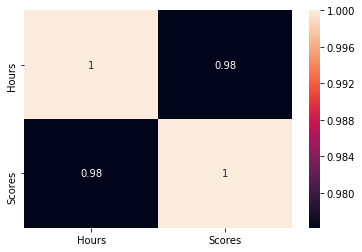

In [9]:
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

From the heatmap, it observed that the correlation is highly positive and the value of correlation between the hours of study and scores is 0.98

#### Preparing the data for modeling

In [10]:
X=df[['Hours']]
y=df[['Scores']]

#### Splitting the data in train and test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
Xtrain.shape , Xtest.shape

((20, 1), (5, 1))

#### Using Linear Regression for building the model and prediction

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression(fit_intercept=True)

#### Fitting the model

In [16]:
lr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Linear Regression intercept
lr.intercept_

array([2.01816004])

In [18]:
# Linear Regression Coefficient for hours
lr.coef_

array([[9.91065648]])

The equation will be:
    1. Scores = intercept + coefficient*(Hours)
    2. Scores = 2.01816004 + 9.91065648*(Hours)
    

#### Plotting the regression line

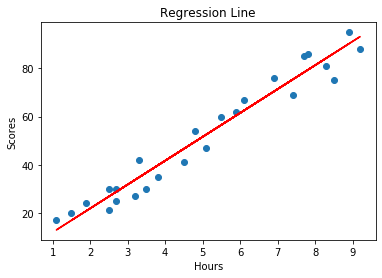

In [74]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line')
plt.show()

#### Predicting for Xtest

In [47]:
y_pred = lr.predict(Xtest)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [53]:
y_pred=y_pred.flatten()

In [63]:
data = pd.DataFrame({'Actual':ytest.values.flatten(),'Prediction':y_pred})

In [64]:
print(data)

   Actual  Prediction
0      20   16.884145
1      27   33.732261
2      69   75.357018
3      30   26.794801
4      62   60.491033


In [75]:
lr.score(Xtest,ytest) #R2 value

0.9454906892105356

94% variation in the Scores is explained by Hours.

#### Testing for new data

In [90]:
hours =np.array(9.25).reshape(1,-1)
result= lr.predict(hours)
print('No. of hours: ',np.asscalar(hours))
print('Predicted score (%): ',np.asscalar(result))

No. of hours:  9.25
Predicted score (%):  93.69173248737538


#### Evaluating the model

In [99]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [100]:
RMSE = mean_squared_error(ytest,y_pred,squared=False)

In [101]:
print('The RMSE is: ',RMSE)

The RMSE is:  4.6474476121003665


In [102]:
MSE = mean_squared_error(ytest,y_pred)

In [103]:
print('The MSE is: ',MSE)

The MSE is:  21.5987693072174


In [104]:
MAE = mean_absolute_error(ytest, y_pred)

In [105]:
print('The MAE is: ',MAE)

The MAE is:  4.183859899002975
